# Results

This notebook contains the code for generating the result plots for all cases. Results are calculated executing the `Comparison_...py` scripts. 

- [1. Full datasets](#1.-Full-datasets)
    - [1.a. Strategies 0 and 1](#1.a.-Strategies-0-and-1)
    - [1.b. Strategy 2](#1.b.-Strategy-2)
    - [1.c. Strategies 3 and 4](#1.c.-Strategies-3-and-4)
- [2. Few instances](#2.-Few-instances)
    - [2.a. Strategies 0 and 1](#2.a.-Strategies-0-and-1)
    - [2.b. Strategy 2](#2.b.-Strategy-2)
    - [2.c. Strategies 3 and 4](#2.c.-Strategies-3-and-4)
- [3. Best of each strategy comparison](#3.-Best-of-each-strategy-comparison)
    - [3.a. Full datasets](#3.a.-Full-datasets)
    - [3.b. Few instances](#3.b.-Few-instances)

In [529]:
import pickle as pk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import sys
sys.path.insert(1, '/home/aolivares/sslearn')

In [530]:
#GLOBAL VARIABLES USED IN DIFFERENT PLOTS 

#########
#DATASETS 
#########
datasets_1 = ['bg_strsq', 'blat_ecolx_1', 'blat_ecolx_2', 'blat_ecolx_3', 'blat_ecolx_4', 'brca1_human_1', 
              'brca1_human_2', 'gal4_yeast', 'hg_flu', 'hsp82_yeast', 'mth3_haeaestabilized', 'pabp_yeast_1',
              'polg_hcvjf', 'rl401_yeast_1', 'rl401_yeast_2', 'ube4b_mouse', 'yap1_human']

datasets_2 = ['pabp_yeast_2', 'avgfp']

datasets_1_2 = datasets_1 + datasets_2

##########################
#MODEL AND BASE ESTIMATORS 
##########################
encoding_models = {
                   'rfr': ('dcae', 'pam250', 'unirep', 'eunirep'),
                   'abr':('dcae', 'pam250', 'unirep', 'eunirep'),
                   'dtr': ('dcae', 'pam250', 'unirep', 'eunirep'),
                   'r': ('dcae', 'pam250', 'unirep', 'eunirep'),
                   'svr': ('dcae', 'pam250', 'unirep', 'eunirep'),
                   'knnr': ('dcae', 'pam250', 'unirep', 'eunirep'),
                  }


wrapper_models = { 
                  'TriTrainingRegressor': ('tritr_rf', 'tritr_ab', 'tritr_dt', 'tritr_r', 'tritr_svm', 'tritr_knn'),
                  'CoRegression': ('cor',)
                 }

wrapper_models_2 = {
                    'rfr': (('TriTrainingRegressor', 'tritr_rf'),),
                    'abr': (('TriTrainingRegressor', 'tritr_ab'),),
                    'dtr': (('TriTrainingRegressor', 'tritr_dt'),),
                    'r': (('TriTrainingRegressor', 'tritr_r'),),
                    'svr': (('TriTrainingRegressor', 'tritr_svm'),),
                    'knnr': (('TriTrainingRegressor', 'tritr_knn'),('CoRegression', 'cor'), )
                   }

wrapper_models_3 = {
                    'rfr': (('dcae', 'TriTrainingRegressor', 'tritr_rf'), ('pam250', 'TriTrainingRegressor', 'tritr_rf')),
                    'abr': (('dcae', 'TriTrainingRegressor', 'tritr_ab'), ('pam250', 'TriTrainingRegressor', 'tritr_ab')),
                    'dtr': (('dcae', 'TriTrainingRegressor', 'tritr_dt'), ('pam250', 'TriTrainingRegressor', 'tritr_dt')),
                    'r': (('dcae', 'TriTrainingRegressor', 'tritr_r'), ('pam250', 'TriTrainingRegressor', 'tritr_r')),
                    'svr': (('dcae', 'TriTrainingRegressor', 'tritr_svm'), ('pam250', 'TriTrainingRegressor', 'tritr_svm')),
                    'knnr': (('dcae', 'TriTrainingRegressor', 'tritr_knn'), ('pam250', 'TriTrainingRegressor', 'tritr_knn'), 
                             ('dcae', 'CoRegression', 'cor'), ('pam250', 'CoRegression', 'cor'))
                    }


            
merge_models = {'MERGE': ('merge_r', 'merge_rf', 'merge_ab', 'merge_dt', 'merge_svm', 'merge_knn')}

#######
#COLORS
#######
dataset_colors = ['gray', 'black', 'darkorange', 'darkgoldenrod', 'yellow', 'olive', 'greenyellow', 
                  'lime', 'darkgreen', 'teal', 'dodgerblue', 'aqua', 'blue', 'indigo', 'darkviolet', 
                  'magenta', 'hotpink', 'red', 'red']

encoding_colors = {
                   'dcae': 'blue', 
                   'pam250': 'orange', 
                   'unirep': 'green', 
                   'eunirep': 'magenta'
                  }

merge_colors = {
                'merge_r': 'darkviolet',
                'merge_rf': 'coral',
                'merge_knn': 'royalblue', 
                'merge_ab': 'green',
                'merge_dt': 'turquoise',
                'merge_svm': 'red'
               }


wrapper_colors = {
                  ('dcae', 'TriTrainingRegressor'): 'blue',
                  ('pam250', 'TriTrainingRegressor'): 'orange', 
                  ('dcae', 'CoRegression'): 'green', 
                  ('pam250', 'CoRegression'): 'red'
                 }

##################
#ABBREVIATION MAPS
##################
metric_labels = {'spearman': r"$\rho$", 
                 'wspearman': r"$\rho_w$", 
                 'wtau': r"$\tau_w$"}

map_encodings = {'dcae': 'DCA', 
                 'pam250': 'PAM250', 
                 'unirep': 'Unirep', 
                 'eunirep': 'eUnirep'}

abbreviations = {'rfr': 'RF', 
                 'abr': 'AB',
                 'dtr': 'DT', 
                 'r': 'Ridge', 
                 'svr': 'SVM', 
                 'knnr': 'K-NN', 
                 'tritr_rf': 'TriTR[RF]', 
                 'tritr_ab': 'TriTR[AB]', 
                 'tritr_dt': 'TriTR[DT]', 
                 'tritr_svm': 'TriTR[SVM]', 
                 'tritr_r': 'TriTR[Ridge]', 
                 'tritr_knn': 'TriTR[K-NN]', 
                 'cor': 'COREG', 
                 'merge_rf': 'MERGE[RF]', 
                 'merge_ab': 'MERGE[AB]', 
                 'merge_dt': 'MERGE[DT]', 
                 'merge_r': 'MERGE[Ridge]', 
                 'merge_svm': 'MERGE[SVM]', 
                 'merge_knn': 'MERGE[K-NN]',
                 'TriTrainingRegressor': 'TriTR', 
                 'CoRegression': 'COREG'
                }

abbreviations_2 = {'tritr_rf': 'TriTR', 
                   'tritr_ab': 'TriTR', 
                   'tritr_dt': 'TriTR', 
                   'tritr_svm': 'TriTR', 
                   'tritr_r': 'TriTR', 
                   'tritr_knn': 'TriTR', 
                   'cor': 'COREG'
                  }

general_model = {
                 'tritr_rf': 'TriTrainingRegressor', 
                 'tritr_ab': 'TriTrainingRegressor', 
                 'tritr_dt': 'TriTrainingRegressor', 
                 'tritr_svm': 'TriTrainingRegressor', 
                 'tritr_r': 'TriTrainingRegressor', 
                 'tritr_knn': 'TriTrainingRegressor', 
                 'cor': 'CoRegression',
                }


# 1. Full datasets

## 1.a. Strategies 0 and 1

In [531]:
data  = []
for model, items in encoding_models.items(): 
    for encoding in items: 
        data_aux = [map_encodings[encoding], abbreviations[model]]
        for metric in ['spearman', 'wspearman']: 
            score_dataset = []
            for dataset in datasets_1_2:
                scores = pk.load(open(f'results/scores_supervised_comparison_{dataset}_{encoding}.pk' , 'rb'))
                aux = np.nan_to_num([s[metric+'_'+model] for s in scores])
                score_dataset.append(np.mean(aux))
                
            data_aux.append(round(np.mean(score_dataset), 3))
            
        data.append(data_aux)
        
df = pd.DataFrame(np.array(data), columns=['Encoding', 'Model', 'spearman', 'wspearman'])
df.sort_values(by=['Encoding', 'Model'])

,Encoding,Model,spearman,wspearman
4,DCA,AB,0.554,0.505
8,DCA,DT,0.499,0.449
20,DCA,K-NN,0.688,0.62
0,DCA,RF,0.668,0.61
12,DCA,Ridge,0.702,0.646
16,DCA,SVM,0.711,0.649
5,PAM250,AB,0.248,0.213
9,PAM250,DT,0.578,0.507
21,PAM250,K-NN,0.611,0.533
1,PAM250,RF,0.681,0.611


In [547]:
import matplotlib.ticker as ticker


def printStrategies0and1(metrics = ['spearman', 'wspearman'], datasets=datasets_1_2): 
    
    datasets = datasets
    colors = dataset_colors
    models = encoding_models

    
    fig, ax1 = plt.subplots(2, figsize=(9, 5))
    
    for n_plot, metric in enumerate(metrics): 
        overall_data = []
        overall_labels = []
        big_labels = []
        
        for model, items in models.items(): 
            row = []
            for encoding in items: 
                row = []
                for dataset in datasets:
                    scores = pk.load(open(f'results/scores_supervised_comparison_{dataset}_{encoding}.pk' , 'rb'))
                    aux = np.nan_to_num([s[metric+'_'+model] for s in scores])
                    row.append(np.mean(aux))

                overall_data.append(row)
                overall_labels.append(map_encodings[encoding])
            big_labels.append(abbreviations[model])

        #BIG PLOT 

        xs=[]
        for i, d in enumerate(overall_data): 
            xs.append(np.random.normal(i+1, 0.15, len(d)))

        bp = ax1[n_plot].boxplot(overall_data, sym='')
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels, rotation = 90)

        i = 0.5
        overall_vlines = [0.5]
        for key in models: 
            length = len(models[key])
            overall_vlines.append(length+i)
            ax1[n_plot].axvline(i+length, color='black', linestyle='-', linewidth=1)
            i+=length

        big_labels_pos = []
        for i in range(len(overall_vlines)-1): 
            big_labels_pos.append((overall_vlines[i]+overall_vlines[i+1])/2)
            

        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(0, 1)
        ax1[n_plot].set_xlim(0.5, len(overall_labels)+0.5)

        ax1[n_plot].set_ylabel(metric_labels[metric])

        for i, (x, d) in enumerate(zip(xs, overall_data)): 
            for axis, point, c, dataset in zip(x, d, colors, datasets):
                alpha_points = 0.4
                if dataset=='avgfp': 
                    marker='X'
                    alpha_points = 1
                elif dataset=='pabp_yeast_2': 
                    marker='^'
                    alpha_points = 1
                else: 
                    marker='o'
                    
                if i==0: 
                    if len(dataset)>14: 
                        dataset = dataset[:12]+'.'
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=dataset, marker=marker)
                else: 
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=None, marker=marker)
        plt.setp(bp['medians'], color='black', linestyle='--')
        
        if n_plot == len(metrics)-1:
            extra_artists = []
 
            lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.7), 
                             ncol=1, fontsize=9, labelspacing=0.3, columnspacing=0)
            extra_artists.append(lgd)
            
            ax1[n_plot].xaxis.set_minor_locator(ticker.FixedLocator(overall_vlines))
            ax1[n_plot].tick_params('x', length=60, width=1, direction='out', which='minor', color='lightgray')
            ax1[n_plot].annotate('', xy=(len(overall_labels)+0.5, -0.44), xycoords='data', 
                                 xytext=(0.5, -0.44), annotation_clip=False, 
                                 arrowprops=dict(arrowstyle='-', color='lightgray'))
            
            for bl, bl_pos in zip(big_labels, big_labels_pos): 
                text = ax1[n_plot].text(bl_pos, -0.48, bl, verticalalignment='top', horizontalalignment='center')
                extra_artists.append(text)
        else: 
            ax1[n_plot].xaxis.set_ticks(range(1,len(overall_labels)+1), ['']*len(overall_labels))
            
    fig.savefig(f'figs/strategies_0_1.pdf', bbox_extra_artists=extra_artists, bbox_inches='tight', format='pdf')

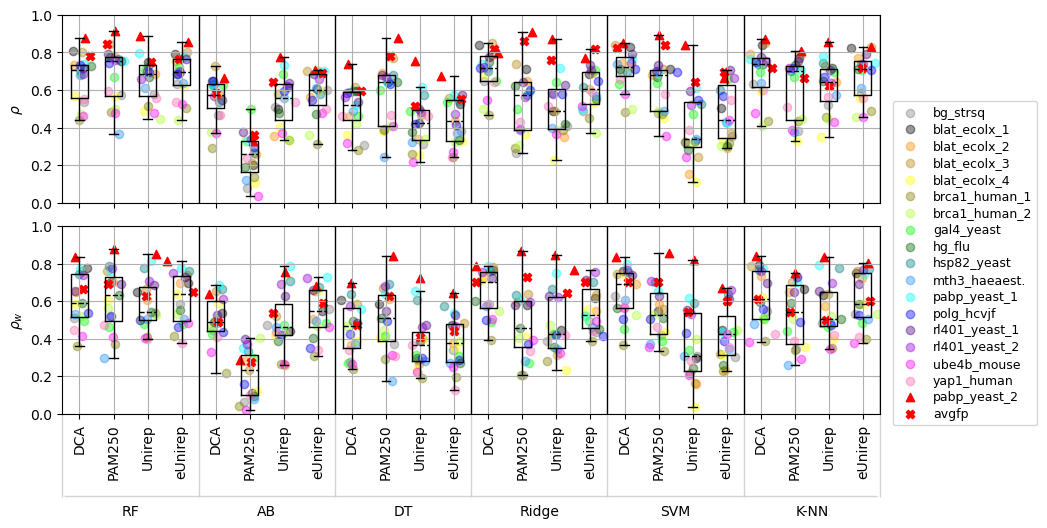

In [548]:
printStrategies0and1()

## 1.b. Strategy 2

In [534]:
data  = []
for model in merge_models['MERGE']: 
        data_aux = [abbreviations[model]]
        for metric in ['spearman', 'wspearman']: 
            score_dataset = []
            for dataset in datasets_1_2:
                scores = pk.load(open(f'results/scores_comparison_MERGE_{dataset}.pk' , 'rb'))
                aux = np.nan_to_num([s[metric+'_'+model] for s in scores])
                score_dataset.append(np.mean(aux))
                
            data_aux.append(round(np.mean(score_dataset), 3))
            
        data.append(data_aux)
        
df = pd.DataFrame(np.array(data), columns=['Model', 'spearman', 'wspearman'])
df.sort_values(by='Model')

,Model,spearman,wspearman
2,MERGE[AB],0.554,0.508
3,MERGE[DT],0.461,0.418
5,MERGE[K-NN],0.618,0.557
1,MERGE[RF],0.595,0.544
0,MERGE[Ridge],0.623,0.572
4,MERGE[SVM],0.634,0.576


In [549]:
import matplotlib.ticker as ticker

def printStrategy2(metrics = ['spearman', 'wspearman']): 
    
    datasets = datasets_1_2
    colors = dataset_colors
    models = merge

    fig, ax1 = plt.subplots(2, figsize=(6, 5))
    extra_artists = []

    
    for n_plot, metric in enumerate(metrics): 
        
        overall_data = []
        overall_labels = []
        
        #add SOTA
        for key, values in models.items():
            for model in values: 
                row = []
                for dataset in datasets: 
                    scores = pk.load(open(f'results/scores_comparison_sota_{key}_{dataset}.pk', 'rb'))
                    row.append(np.mean([s[metric+'_'+model] for s in scores]))
                overall_labels.append(abbreviations[model])
                overall_data.append(row)

        #BIG PLOT 
        xs=[]
        for i, d in enumerate(overall_data): 
            xs.append(np.random.normal(i+1, 0.09, len(d)))

        bp = ax1[n_plot].boxplot(overall_data, showfliers=False)
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels, rotation = 90)

        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(0, 1)
        ax1[n_plot].set_xlim(0.5, len(overall_labels)+0.5)

        ax1[n_plot].set_ylabel(metric_labels[metric])

        alpha_points = 0.4
        for i, (x, d) in enumerate(zip(xs, overall_data)): 
            for axis, point, c, dataset in zip(x, d, colors, datasets):
                alpha_points=0.4
                if dataset=='avgfp': 
                    marker='X'
                    alpha_points = 1
                elif dataset=='pabp_yeast_2': 
                    marker='^'
                    alpha_points = 1
                else: 
                    marker='o'
                if i==0:     
                    if len(dataset)>14: 
                        dataset = dataset[:12]+'.'
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=dataset, marker=marker)
                else: 
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=None, marker=marker)
        plt.setp(bp['medians'], color='black', linestyle='--')
        
        if n_plot == len(metrics)-1:
            
            lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.35,2), 
                             ncol=1, fontsize=9, labelspacing=0.3, columnspacing=0)
            extra_artists.append(lgd)
        else: 
            ax1[n_plot].xaxis.set_ticks(range(1,len(overall_labels)+1), ['']*len(overall_labels))
            
    fig.savefig(f'figs/strategy_2.pdf', bbox_extra_artists=extra_artists, bbox_inches='tight', format='pdf') 

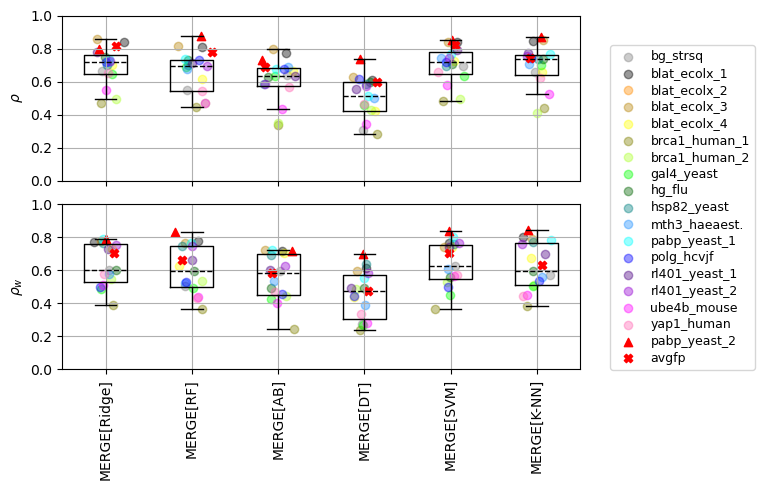

In [550]:
printStrategy2()

## 1.c. Strategies 3 and 4

In [537]:
wrapper_models = { 
                  'TriTrainingRegressor': ('tritr_rf', 'tritr_ab', 'tritr_dt', 'tritr_r', 'tritr_svm', 'tritr_knn'),
                  'CoRegression': ('cor',)
                 }
data = []

for model, estimators in wrapper_models.items(): 
    for estimator in estimators: 
        for encoding in ['dcae', 'pam250']: 
            data_aux = [map_encodings[encoding], abbreviations[estimator]]
            for metric in ['spearman', 'wspearman']: 

                score_dataset = []
                for dataset in datasets_1_2: 
                    scores = pk.load(open(f'results/scores_comparison_{model}_{dataset}_{encoding}.pk' , 'rb'))
                    aux = np.nan_to_num([s[metric+'_'+estimator] for s in scores])
                    score_dataset.append(np.mean(aux))
                data_aux.append(round(np.mean(score_dataset), 3))
            data.append(data_aux)
            
df = pd.DataFrame(np.array(data), 
                 columns = ['Encoding', 'Model', 'spearman', 'wspearman'])
df.sort_values(by='Encoding')

,Encoding,Model,spearman,wspearman
0,DCA,TriTR[RF],0.659,0.605
2,DCA,TriTR[AB],0.576,0.528
4,DCA,TriTR[DT],0.563,0.518
6,DCA,TriTR[Ridge],0.691,0.635
8,DCA,TriTR[SVM],0.706,0.644
10,DCA,TriTR[K-NN],0.682,0.611
12,DCA,COREG,0.683,0.622
1,PAM250,TriTR[RF],0.671,0.602
3,PAM250,TriTR[AB],0.306,0.266
5,PAM250,TriTR[DT],0.622,0.552


In [551]:
import matplotlib.ticker as ticker


def printStrategies3and4(metrics = ['spearman', 'wspearman'], datasets=datasets_1_2): 
    
    datasets = datasets
    colors = dataset_colors
    models = wrapper_models_3
    
    fig, ax1 = plt.subplots(2, figsize=(9, 5))
    
    for n_plot, metric in enumerate(metrics): 
        overall_data = []
        overall_labels = []
        big_labels = []
        
        for base_estimator, items in models.items(): 
            for encoding, model, method in items: 
                row = []
                for dataset in datasets:
                    scores = pk.load(open(f'results/scores_comparison_{model}_{dataset}_{encoding}.pk' , 'rb'))
                    aux = np.nan_to_num([s[metric+'_'+method] for s in scores])
                    row.append(np.mean(aux))

                overall_data.append(row)
                overall_labels.append(f'{map_encodings[encoding]}+\n{abbreviations[method]}')
            big_labels.append(abbreviations[base_estimator])

        #BIG PLOT 

        xs=[]
        for i, d in enumerate(overall_data): 
            xs.append(np.random.normal(i+1, 0.15, len(d)))

        bp = ax1[n_plot].boxplot(overall_data, sym='')
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels, rotation = 90)

        i = 0.5
        overall_vlines = [0.5]
        for key in models: 
            length = len(models[key])
            overall_vlines.append(length+i)
            ax1[n_plot].axvline(i+length, color='black', linestyle='-', linewidth=1)
            i+=length

        big_labels_pos = []
        for i in range(len(overall_vlines)-1): 
            big_labels_pos.append((overall_vlines[i]+overall_vlines[i+1])/2)
            

        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(0, 1)
        ax1[n_plot].set_xlim(0.5, len(overall_labels)+0.5)

        ax1[n_plot].set_ylabel(metric_labels[metric])

        for i, (x, d) in enumerate(zip(xs, overall_data)): 
            for axis, point, c, dataset in zip(x, d, colors, datasets):
                alpha_points = 0.4
                if dataset=='avgfp': 
                    marker='X'
                    alpha_points = 1
                elif dataset=='pabp_yeast_2': 
                    marker='^'
                    alpha_points = 1
                else: 
                    marker='o'
                    
                if i==0: 
                    if len(dataset)>14: 
                        dataset = dataset[:12]+'.'
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=dataset, marker=marker)
                else: 
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=None, marker=marker)
        plt.setp(bp['medians'], color='black', linestyle='--')
        
        if n_plot == len(metrics)-1:
            extra_artists = []
 
            lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.7), 
                             ncol=1, fontsize=9, labelspacing=0.3, columnspacing=0)
            extra_artists.append(lgd)
            
            ax1[n_plot].xaxis.set_minor_locator(ticker.FixedLocator(overall_vlines))
            ax1[n_plot].tick_params('x', length=75, width=1, direction='out', which='minor', color='lightgray')
            ax1[n_plot].annotate('', xy=(len(overall_labels)+0.5, -0.6), xycoords='data', 
                                 xytext=(0.5, -0.6), annotation_clip=False, 
                                 arrowprops=dict(arrowstyle='-', color='lightgray'))
            
            for bl, bl_pos in zip(big_labels, big_labels_pos): 
                text = ax1[n_plot].text(bl_pos, -0.64, bl, verticalalignment='top', horizontalalignment='center')
                extra_artists.append(text)
                
                
        else: 
            ax1[n_plot].xaxis.set_ticks(range(1,len(overall_labels)+1), ['']*len(overall_labels))
    fig.savefig(f'figs/strategies_3_4.pdf', bbox_extra_artists=extra_artists, bbox_inches='tight', format='pdf')

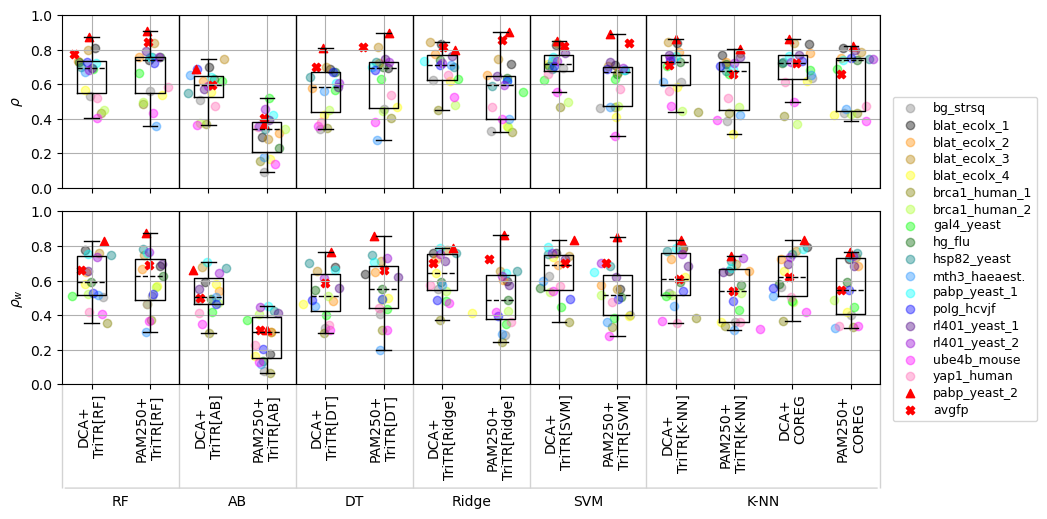

In [552]:
printStrategies3and4()

# 2. Few instances

## 2.a. Strategies 0 and 1

In [540]:
n_instances = [250, 200, 150, 100, 50]

data = []

for model, items in encoding_models.items(): 
    for encoding in items: 
        data_aux = [map_encodings[encoding], abbreviations[model]]
        for metric in ['spearman', 'wspearman']: 
            for n in n_instances: 
                score_dataset = []
                for dataset in datasets_1_2:
                    scores = pk.load(open(f'results/scores_supervised_comparison_{dataset}_{n}_instances_{encoding}.pk' , 'rb'))
                    aux = np.nan_to_num([s[metric+'_'+model] for s in scores])
                    score_dataset.append(np.mean(aux))
                data_aux.append(round(np.mean(score_dataset), 3))
        data.append(data_aux)
        
df = pd.DataFrame(np.array(data), 
                  columns=['Encoding','Model','s.250','s.200','s.150','s.100','s.50','ws.250','ws.200','ws.150','ws.100','ws.50' ])
df.sort_values(by='Encoding')

,Encoding,Model,s.250,s.200,s.150,s.100,s.50,ws.250,ws.200,ws.150,ws.100,ws.50
0,DCA,RF,0.522,0.499,0.471,0.421,0.331,0.47,0.448,0.42,0.376,0.286
16,DCA,SVM,0.635,0.624,0.608,0.585,0.546,0.582,0.574,0.558,0.538,0.5
12,DCA,Ridge,0.514,0.483,0.439,0.385,0.301,0.463,0.435,0.389,0.341,0.257
4,DCA,AB,0.479,0.46,0.438,0.403,0.318,0.435,0.419,0.397,0.362,0.276
8,DCA,DT,0.324,0.305,0.275,0.234,0.178,0.298,0.281,0.247,0.213,0.156
20,DCA,K-NN,0.423,0.394,0.35,0.292,0.205,0.36,0.333,0.293,0.241,0.168
13,PAM250,Ridge,0.378,0.356,0.326,0.28,0.212,0.335,0.315,0.284,0.242,0.175
17,PAM250,SVM,0.469,0.447,0.419,0.378,0.318,0.398,0.379,0.354,0.319,0.264
9,PAM250,DT,0.323,0.293,0.257,0.21,0.145,0.272,0.246,0.22,0.174,0.118
5,PAM250,AB,0.183,0.176,0.17,0.167,0.153,0.155,0.153,0.148,0.146,0.134


In [553]:
import numpy as np
import statistics 


def set_box_color(bp, color): 

    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['means'], color='black')
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['caps'], color='black')
    
    for patch in bp['boxes']: 
        patch.set_facecolor(color)


def printEvolutionStrategies0and1( metric='spearman', datasets=datasets_1_2): 

    n_instances = ['250', '200', '150', '100', '50']
    
    offsets = [0.35, 0.7, 1.05, 1.4]
    
    models = encoding_models
    colors = encoding_colors
    datasets = datasets
    
    fig = plt.figure(figsize=(10, 5))
    
    for case, base_estimator in enumerate(models.keys()): 
    
        semi_data = []
        semi_data_mean = []
        for encoding in models[base_estimator]: 
            model_data = []
            model_data_mean = []
            for n in n_instances: 
                row = []
                for dataset in datasets: 
                    scores = pk.load(open(f'results/scores_supervised_comparison_{dataset}_{n}_instances_{encoding}.pk', 'rb'))
                    row.append(np.mean([s[metric+'_'+base_estimator] for s in scores]))
                model_data.append(row)
                model_data_mean.append(statistics.median(row))
            semi_data.append(model_data)
            semi_data_mean.append(model_data_mean)


        semi_data_x = []
        for i, encoding in enumerate(models[base_estimator]): 
            semi_data_x.append(np.array(range(len(semi_data[i])))*2+offsets[i])


        plt.subplot(2, 3, case+1)

        for i, encoding in enumerate(models[base_estimator]): 
            plt.plot(semi_data_x[i], semi_data_mean[i], '--', color=colors[encoding])
        #plt.legend(fontsize=8)

        for i, encoding in enumerate(models[base_estimator]): 
            bp = plt.boxplot(semi_data[i], positions=semi_data_x[i], sym='.', widths=0.35, patch_artist=True)
            set_box_color(bp, colors[encoding])


        plt.xlabel('# labeled instances')
        plt.xticks(range(0, int(len(n_instances) * 2), 2), n_instances)
        plt.xlim(-1.5, len(n_instances)*2)
        plt.ylim(0, 0.8)

        plt.ylabel(metric_labels[metric])
        plt.title(abbreviations[base_estimator])

        plt.tight_layout()
        plt.grid()
      
    #overall legend 
    methods = []
    for aux in models.values(): 
        for name in aux: 
            methods.append(name)
    methods = set(methods)
    for method in methods:
        label = method
        plt.scatter([],[], color=colors[method], marker='s', label=map_encodings[label])
        
    plt.legend(loc='lower center', bbox_to_anchor=(-0.9, -0.6), ncol=len(methods)+1, title='Encoding:')
    
    fig.savefig(f'figs/evolution_{metric}_strategies_0_1.pdf', bbox_inches='tight', format='pdf')


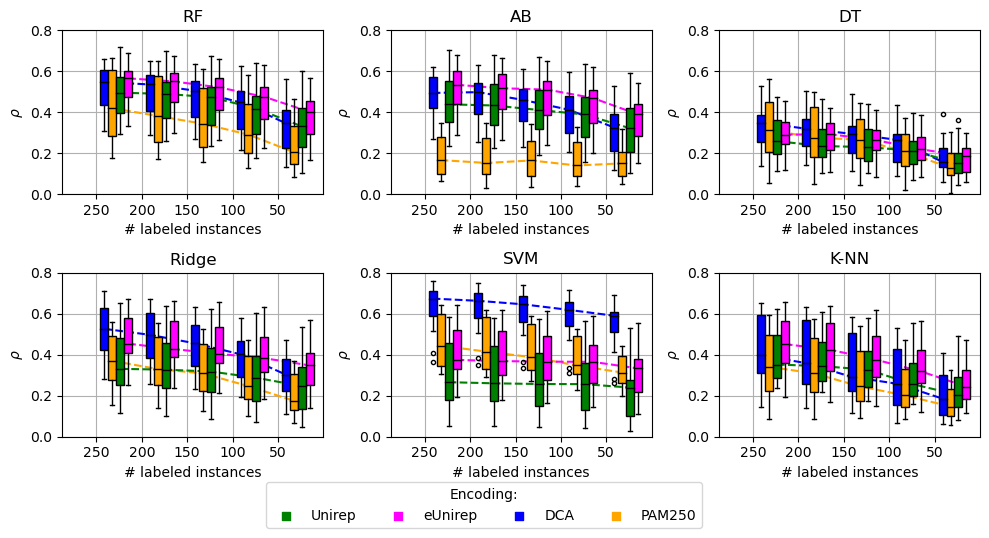

In [554]:
printEvolutionStrategies0and1()

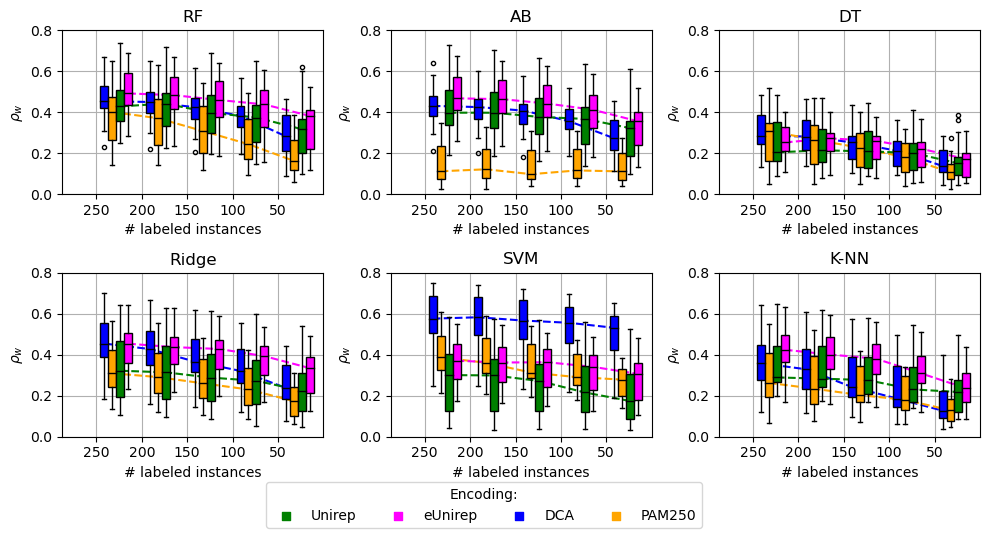

In [555]:
printEvolutionStrategies0and1(metric='wspearman')

## 2.b. Strategy 2

In [544]:
n_instances = [250, 200, 150, 100, 50]

data = []

for model in merge_models['MERGE']:
    data_aux = [abbreviations[model]]
    for metric in ['spearman', 'wspearman']: 
        for n in n_instances: 
            score_dataset = []
            for dataset in datasets_1_2:
                scores = pk.load(open(f'results/scores_comparison_MERGE_{dataset}_{n}_instances.pk' , 'rb'))
                aux = np.nan_to_num([s[metric+'_'+model] for s in scores])
                score_dataset.append(np.mean(aux))
            data_aux.append(round(np.mean(score_dataset), 3))
    data.append(data_aux)
    
df = pd.DataFrame(np.array(data), 
                  columns=['Model', 's.250','s.200','s.150','s.100','s.50','ws.250','ws.200','ws.150','ws.100','ws.50'])
df.sort_values(by='Model')

,Model,s.250,s.200,s.150,s.100,s.50,ws.250,ws.200,ws.150,ws.100,ws.50
2,MERGE[AB],0.47,0.453,0.424,0.385,0.318,0.428,0.415,0.384,0.344,0.276
3,MERGE[DT],0.312,0.298,0.268,0.232,0.195,0.289,0.274,0.241,0.21,0.17
5,MERGE[K-NN],0.514,0.506,0.475,0.44,0.409,0.441,0.431,0.4,0.371,0.348
1,MERGE[RF],0.487,0.469,0.44,0.402,0.346,0.439,0.423,0.393,0.355,0.3
0,MERGE[Ridge],0.479,0.456,0.416,0.371,0.323,0.43,0.408,0.364,0.321,0.272
4,MERGE[SVM],0.578,0.571,0.556,0.533,0.517,0.528,0.522,0.506,0.483,0.469


In [556]:
import numpy as np
import statistics 


def set_box_color_ev(bp, color): 

    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['means'], color='black')
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['caps'], color='black')
    
    for patch in bp['boxes']: 
        patch.set_facecolor(color)

def printEvolutionStrategy2(metrics = ['spearman', 'wspearman']): 
    
    
    n_instances = ['250', '200', '150', '100', '50']
    offsets = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
    
    datasets = datasets_1_2
    models = merge
    
    model_names = []
    for key, values in models.items(): 
        for model in values: 
            model_names.append(model)
    
    fig, ax1 = plt.subplots(2, figsize=(7, 5))
    extra_artists=[]
    
    for n_plot, metric in enumerate(metrics): 

        data = []
        data_mean = []
        
        #add SOTA
        for key, values in models.items():
            for model in values: 
                model_data = []
                model_data_mean = []
                for n in n_instances: 
                    row = []
                    for dataset in datasets: 
                        scores = pk.load(open(f'results/scores_comparison_sota_{key}_{dataset}_{n}_instances.pk', 'rb'))
                        row.append(np.mean([s[metric+'_'+model] for s in scores]))
                    model_data.append(row)
                    model_data_mean.append(statistics.median(row))
                data.append(model_data)
                data_mean.append(model_data_mean)

        data_x = [] 
        for i, model in enumerate(model_names):  
            data_x.append(np.array(range(len(data[i])))*2+offsets[i])


        for i, model in enumerate(model_names):  
            ax1[n_plot].plot(data_x[i], data_mean[i], '--', color=merge_colors[model])
            bp = ax1[n_plot].boxplot(data[i], positions=data_x[i], sym='.', widths=0.2, patch_artist=True)
            set_box_color_ev(bp, merge_colors[model])

        ax1[n_plot].set_xlabel('# labeled instances')
        ax1[n_plot].set_xticks(range(0, int(len(n_instances)*2), 2), n_instances)
        ax1[n_plot].set_xlim(-1, len(n_instances)*2)
        ax1[n_plot].set_ylim(0, 1)
        ax1[n_plot].set_ylabel(metric_labels[metric])
        plt.tight_layout()
        ax1[n_plot].grid()

    #overall legend
    for model in model_names: 
        ax1[n_plot].scatter([], [], color = merge_colors[model],  marker='s', label=abbreviations[model])

    lgd = plt.legend(loc='lower center', bbox_to_anchor=(0.45, -0.6), ncol=(len(model_names)+1)//2, columnspacing=0.8)
    extra_artists.append(lgd)

    fig.savefig(f'figs/evolution_strategy_2.pdf', bbox_extra_artists=extra_artists, bbox_inches='tight', format='pdf')

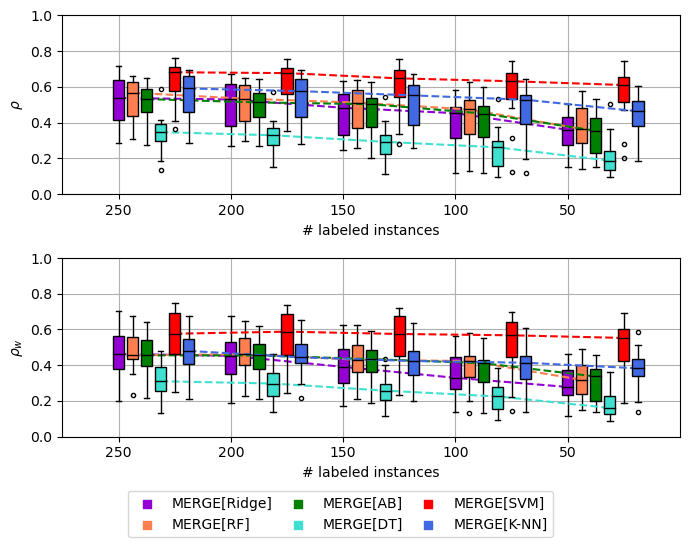

In [557]:
printEvolutionStrategy2()

## 2.c. Strategies 3 and 4

In [260]:
wrapper_models = { 
                  'TriTrainingRegressor': ('tritr_rf', 'tritr_ab', 'tritr_dt', 'tritr_r', 'tritr_svm', 'tritr_knn'),
                  'CoRegression': ('cor',)
                 }

n_instances = [250, 200, 150, 100, 50]

data = []

for model, estimators in wrapper_models.items(): 
    for estimator in estimators: 
        for encoding in ['dcae', 'pam250']:
            data_aux = [map_encodings[encoding], abbreviations[estimator]]
            for metric in ['spearman', 'wspearman']: 
                for n in n_instances: 
                    score_dataset = []
                    for dataset in datasets_1_2: 
                        scores = pk.load(open(f'results/scores_comparison_{model}_{dataset}_{encoding}_{n}_instances.pk' , 'rb'))
                        aux = np.nan_to_num([s[metric+'_'+estimator] for s in scores])
                        score_dataset.append(np.mean(aux))
                    data_aux.append(round(np.mean(score_dataset), 3))
            data.append(data_aux)
    
df = pd.DataFrame(np.array(data), 
                 columns = ['Encoding', 'Model', 's.250','s.200','s.150','s.100','s.50','ws.250','ws.200','ws.150','ws.100','ws.50'])
df.sort_values(by='Encoding')

,Encoding,Model,s.250,s.200,s.150,s.100,s.50,ws.250,ws.200,ws.150,ws.100,ws.50
0,DCA,TriTR[RF],0.504,0.482,0.455,0.396,0.292,0.451,0.431,0.406,0.352,0.253
2,DCA,TriTR[AB],0.495,0.477,0.449,0.404,0.298,0.449,0.429,0.402,0.358,0.257
4,DCA,TriTR[DT],0.369,0.347,0.32,0.274,0.193,0.338,0.316,0.287,0.246,0.166
6,DCA,TriTR[Ridge],0.485,0.458,0.41,0.367,0.287,0.433,0.408,0.36,0.32,0.241
8,DCA,TriTR[SVM],0.628,0.616,0.599,0.577,0.536,0.575,0.567,0.55,0.53,0.493
10,DCA,TriTR[K-NN],0.409,0.376,0.336,0.272,0.204,0.345,0.318,0.283,0.224,0.166
12,DCA,COREG,0.498,0.467,0.431,0.392,0.323,0.444,0.411,0.379,0.348,0.285
1,PAM250,TriTR[RF],0.445,0.414,0.374,0.316,0.236,0.38,0.353,0.313,0.26,0.187
3,PAM250,TriTR[AB],0.24,0.234,0.224,0.213,0.207,0.212,0.209,0.2,0.189,0.179
5,PAM250,TriTR[DT],0.361,0.329,0.293,0.247,0.169,0.305,0.276,0.246,0.207,0.137


In [558]:
# TODO 

def printEvolutionStrategies3and4( metric='spearman', datasets=datasets_1_2): 

    n_instances = ['250', '200', '150', '100', '50']
    
    offsets = [0.35, 0.7, 1.05, 1.4]
    
    models = wrapper_models_3
    colors = wrapper_colors
    datasets = datasets
    
    fig = plt.figure(figsize=(10, 5))
    
    for case, (base_estimator, items) in enumerate(models.items()): 
        semi_data = []
        semi_data_mean = []
        for encoding, model, method in items: 
            model_data = []
            model_data_mean = []
            for n in n_instances: 
                row = []
                for dataset in datasets:
                    scores = pk.load(open(f'results/scores_comparison_{general_model[method]}_{dataset}_{encoding}_{n}_instances.pk', 'rb'))
                    row.append(np.mean([s[metric+'_'+method] for s in scores]))
                model_data.append(row)
                model_data_mean.append(statistics.median(row))
            semi_data.append(model_data)
            semi_data_mean.append(model_data_mean)


        semi_data_x = []
        for i, (encoding, model, method) in enumerate(models[base_estimator]): 
            semi_data_x.append(np.array(range(len(semi_data[i])))*2+offsets[i])


        plt.subplot(2, 3, case+1)

        for i, (encoding, model, method) in enumerate(models[base_estimator]): 
            plt.plot(semi_data_x[i], semi_data_mean[i], '--', color=colors[(encoding, model)])
        #plt.legend(fontsize=8)

        for i, (encoding, model, method) in enumerate(models[base_estimator]): 
            bp = plt.boxplot(semi_data[i], positions=semi_data_x[i], sym='.', widths=0.35, patch_artist=True)
            set_box_color(bp, colors[(encoding, model)])


        plt.xlabel('# labeled instances')
        plt.xticks(range(0, int(len(n_instances) * 2), 2), n_instances)
        plt.xlim(-1.5, len(n_instances)*2)
        plt.ylim(0, 0.8)

        plt.ylabel(metric_labels[metric])
        plt.title(abbreviations[base_estimator])

        plt.tight_layout()
        plt.grid()
      
    #overall legend 
    methods = []
    for case, (base_estimator, items) in enumerate(models.items()): 
        for encoding, model, method in items: 
            methods.append((encoding, model))
    methods = set(methods)
    for encoding, model in methods: 
        plt.scatter([], [], color=colors[(encoding, model)], marker='s', label=f'{map_encodings[encoding]} + {abbreviations[model]}')
    
    
    plt.legend(loc='lower center', bbox_to_anchor=(-0.9, -0.6), ncol=len(methods)+1, title='Encoding + Model:')
    
    fig.savefig(f'figs/evolution_{metric}_strategies_3_4.pdf', bbox_inches='tight', format='pdf')

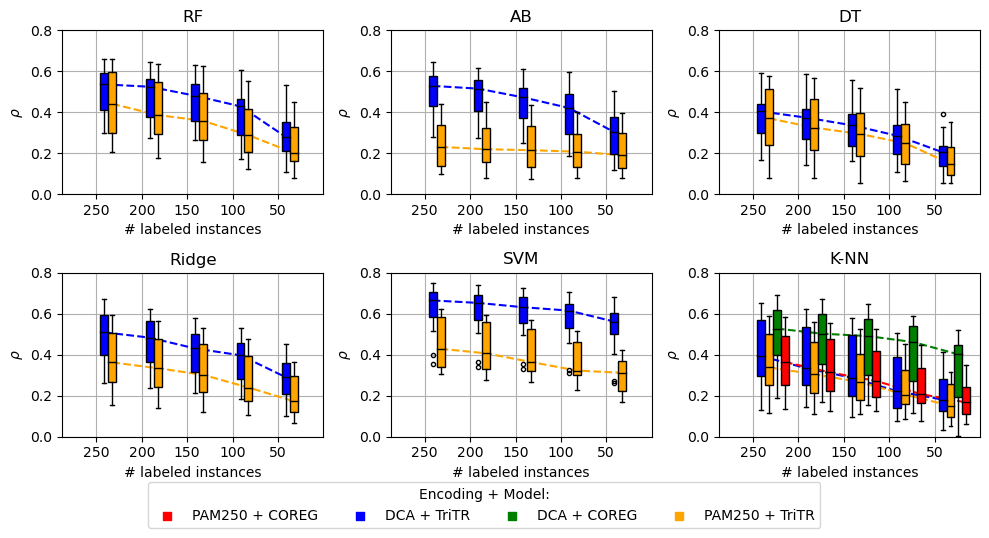

In [559]:
printEvolutionStrategies3and4()

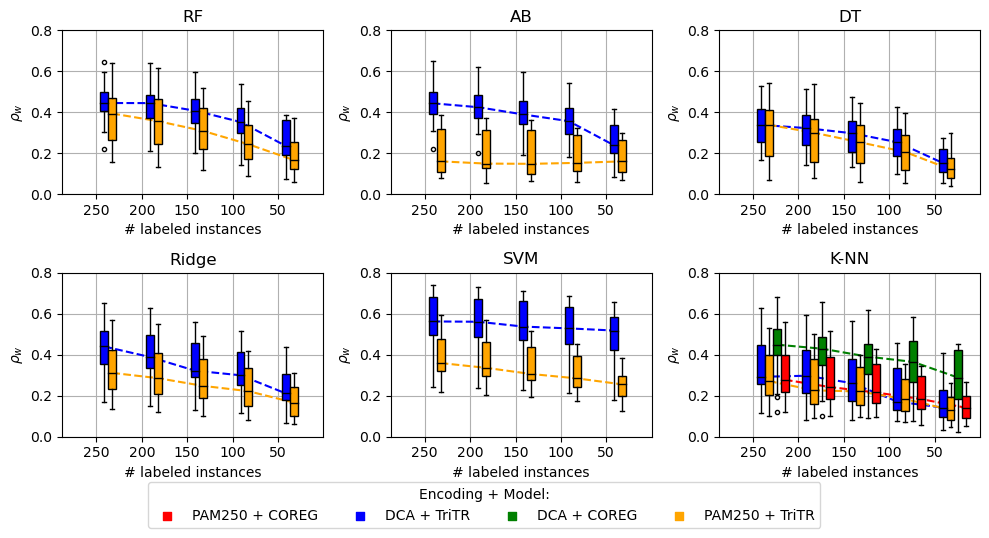

In [560]:
printEvolutionStrategies3and4(metric='wspearman')

# 3. Best of each strategy comparison
## 3.a. Full datasets

In [561]:
def printEvolutionFinalAll(metrics = ['spearman', 'wspearman']): 
    
    best_models = [
        ('s0', 'unirep', 'rfr'), 
        ('s1', 'dcae', 'svr'), 
        ('s2', 'dcae', 'merge_svm'), 
        ('s3', 'pam250', 'tritr_rf'), 
        ('s4', 'dcae', 'tritr_svm')
    ]
    
    datasets = datasets_1_2
    colors = dataset_colors
    
    fig, ax1 = plt.subplots(2, figsize=(6, 6))
    extra_artists = []
    
    for n_plot, metric in enumerate(metrics): 
        
        overall_data = []
        overall_labels = []
        
        model_names = []
        for strategy, encoding, method in best_models:
            
            overall_labels.append(f'{strategy.upper()}:\n{map_encodings[encoding]}\n+\n{abbreviations[method]}')
    
            row = []
            for dataset in datasets: 
                if strategy in ['s0', 's1']: 
                    scores = pk.load(open(f'results/scores_supervised_comparison_{dataset}_{encoding}.pk', 'rb'))
                elif strategy in ['s2']: 
                    scores = pk.load(open(f'results/scores_comparison_MERGE_{dataset}.pk', 'rb'))
                elif strategy in ['s3', 's4']: 
                    scores = pk.load(open(f'results/scores_comparison_{general_model[method]}_{dataset}_{encoding}.pk', 'rb'))
                    
                row.append(np.mean([s[metric+'_'+method] for s in scores]))
                
            overall_data.append(row)
            
        #BIG PLOT 
        xs=[]
        for i, d in enumerate(overall_data): 
            xs.append(np.random.normal(i+1, 0.09, len(d)))
            
        bp = ax1[n_plot].boxplot(overall_data, showfliers=False)
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels)
        
        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(0, 1)
        ax1[n_plot].set_xlim(0.5, len(overall_labels)+0.5)
        
        ax1[n_plot].set_ylabel(metric_labels[metric])
        
        alpha_points = 0.4
        for i, (x, d) in enumerate(zip(xs, overall_data)): 
            for axis, point, c, dataset in zip(x, d, colors, datasets):
                alpha_points=0.4
                if dataset=='avgfp': 
                    marker='X'
                    alpha_points = 1
                elif dataset=='pabp_yeast_2': 
                    marker='^'
                    alpha_points = 1
                else: 
                    marker='o'
                if i==0:     
                    if len(dataset)>14: 
                        dataset = dataset[:12]+'.'
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=dataset, marker=marker)
                else: 
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=None, marker=marker)
        plt.setp(bp['medians'], color='black', linestyle='--')
        
        if n_plot == len(metrics)-1:
            
            lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.35,2), 
                             ncol=1, fontsize=9, labelspacing=0.3, columnspacing=0)
            extra_artists.append(lgd)
        else: 
            ax1[n_plot].xaxis.set_ticks(range(1,len(overall_labels)+1), ['']*len(overall_labels))

    fig.savefig(f'figs/best_of_each_strategy.pdf', bbox_extra_artists=extra_artists, bbox_inches='tight',format='pdf')

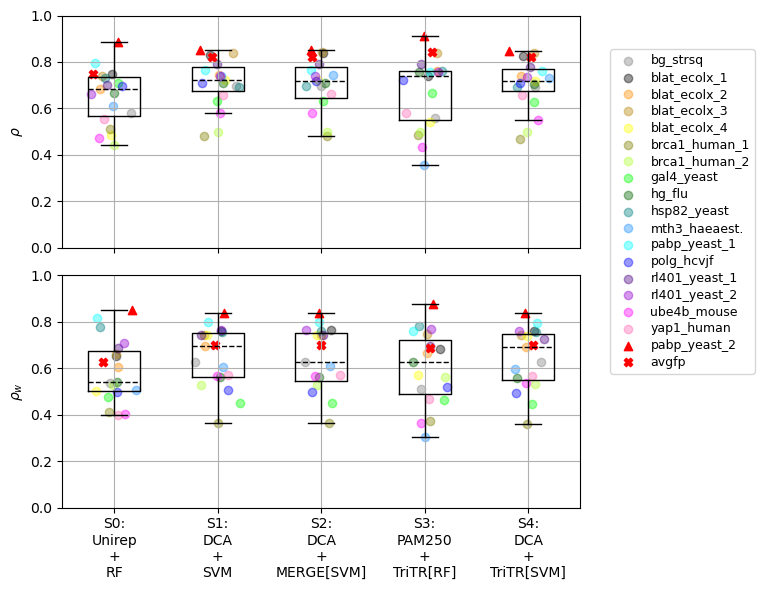

In [562]:
printEvolutionFinalAll()

## 3.b. Few instances

In [563]:
import numpy as np
import statistics 

def set_box_color_ev(bp): 

    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['means'], color='black')
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['caps'], color='black')
    

def printEvolutionFinalFew(metrics = ['spearman', 'wspearman']): 
    
    
    n_instances = ['250', '200', '150', '100', '50']
    offsets = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.7]
    
    best_models = [
                    ('s0', 'unirep', 'rfr'), 
                    ('s1', 'dcae', 'svr'), 
                    ('s2', 'dcae', 'merge_svm'), 
                    ('s3', 'pam250','tritr_svm'), 
                    ('s4', 'dcae', 'tritr_svm')
                  ]
    
    datasets = datasets_1_2
    d_colors = dataset_colors
    
    fig, ax1 = plt.subplots(2, figsize=(12, 7))
    extra_artists=[]

    for n_plot, metric in enumerate(metrics): 
        
        ax2 = ax1[n_plot].twiny()

        data = []
        data_mean = []
        
        
        #add results 
        
        model_names = []
        for strategy, encoding, method in best_models: 
            model_names.append(f'{strategy.upper()}: {map_encodings[encoding]} + {abbreviations[method]}')
            
            model_data = []
            model_data_mean = []
            for n in n_instances: 
                row = []
                for dataset in datasets: 
                    
                    if strategy in ['s0', 's1']: 
                        scores = pk.load(open(f'results/scores_supervised_comparison_{dataset}_{n}_instances_{encoding}.pk', 'rb'))
                    elif strategy in ['s2']: 
                        scores = pk.load(open(f'results/scores_comparison_MERGE_{dataset}_{n}_instances.pk', 'rb'))
                    elif strategy in ['s3', 's4']: 
                        scores = pk.load(open(f'results/scores_comparison_{general_model[method]}_{dataset}_{encoding}_{n}_instances.pk', 'rb'))
                    
                    row.append(np.mean([s[f'{metric}_{method}'] for s in scores]))
                model_data.append(row)
                model_data_mean.append(statistics.median(row))
            data.append(model_data)
            data_mean.append(model_data_mean)

        data_x = [] 
        for i, model in enumerate(model_names):  
            data_x.append(np.array(range(len(data[i])))*2+offsets[i])
        
        #boxplots
        for i, model in enumerate(model_names):  
            ax1[n_plot].plot(data_x[i], data_mean[i], linestyle=(0,(3,3)), color='black', linewidth=0.7)
            bp = ax1[n_plot].boxplot(data[i], positions=data_x[i], sym='', widths=0.25, patch_artist=True, boxprops={'fill': None})
            set_box_color_ev(bp)
            
            
        #scatter
        for i, model in enumerate(model_names): 
            xs=[]
            for j, d in zip(data_x[i], data[i]):
                xs.append(np.random.normal(j, 0.035, len(d)))
            for j, (x, d) in enumerate(zip(xs, data[i])): 
                for axis, point, c, dataset in zip(x, d, d_colors, datasets): 
                    alpha_points=0.4
                    marker='o'
                    if dataset=='avgfp': 
                        marker='X'
                        alpha_points = 1
                    elif dataset=='pabp_yeast_2': 
                        marker='^'
                        alpha_points = 1
                    if i==0 and j==0 and n_plot==1: 
                        ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=dataset, marker=marker)
                    else: 
                        ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=None, marker=marker)

        #lower axis 
        ax1[n_plot].set_xticks(range(0, int(len(n_instances)*2), 2), n_instances)
        ax1[n_plot].set_xlim(-0.5, len(n_instances)*2-0.5)
        ax1[n_plot].set_ylim(-0, 0.8)
        ax1[n_plot].set_ylabel(metric_labels[metric])
        ax1[n_plot].grid()
        
        if n_plot==1: 
            ax1[n_plot].set_xlabel('# labeled instances')
            ax2.set_xticks([],[])
        #upper axis
        else: 
            x_values, x_names = [], []
            for i, n in enumerate(n_instances): 
                for j, model in enumerate(model_names):
                    x_values.append(data_x[j][i])
                    x_names.append(model)

            ax2.set_xticks(x_values, x_names, rotation = 35, ha='left', fontsize=9)
            ax2.set_xlim(-0.5, len(n_instances)*2-0.5)
        
    plt.tight_layout()
    lgd = ax1[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=7, columnspacing=0.8, fontsize=9)
    extra_artists.append(lgd)

    fig.savefig(f'figs/evolution_best_of_each_strategy.pdf', bbox_extra_artists=extra_artists, bbox_inches='tight',format='pdf')

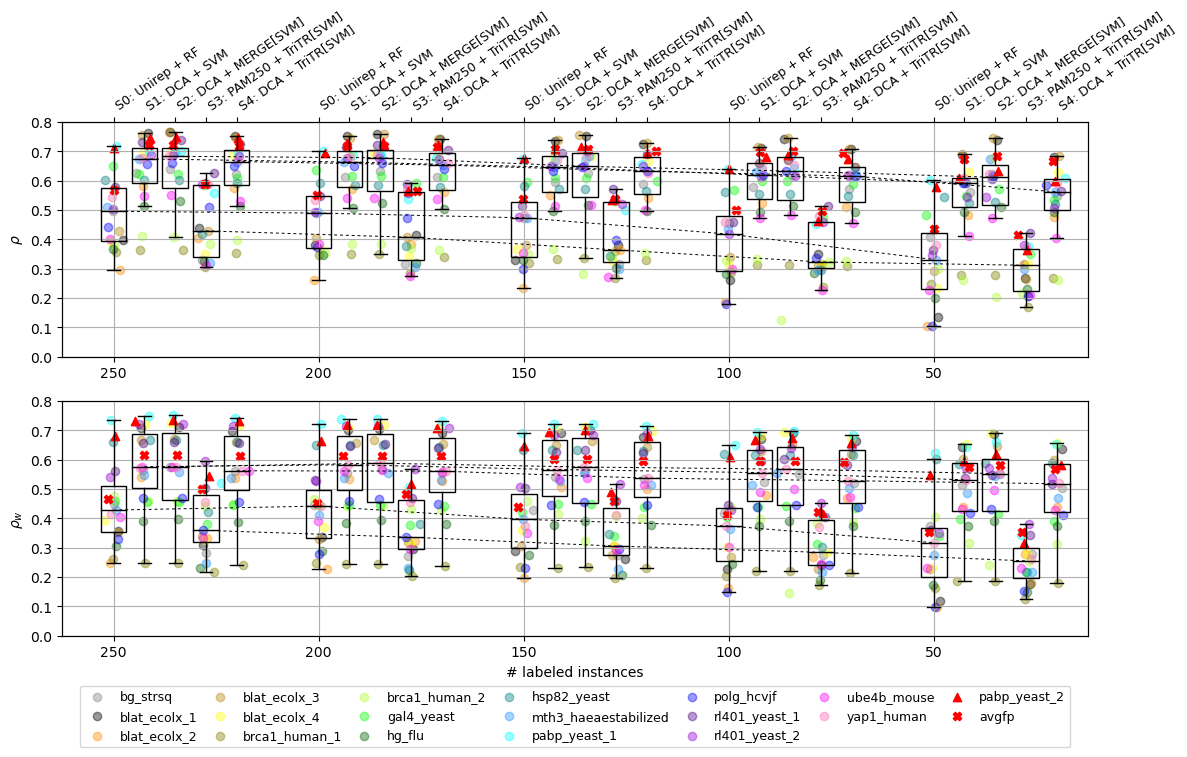

In [564]:
printEvolutionFinalFew(metrics = ['spearman', 'wspearman'])